In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import plotnine as p9

In [2]:
df = pd.read_csv('beauty.csv', nrows=40)

In [3]:
results = smf.ols('courseevaluation ~ btystdave', data=df).fit()
wyn=results.params

In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.3876
Date:                Sun, 08 Dec 2019   Prob (F-statistic):              0.537
Time:                        22:19:25   Log-Likelihood:                -30.364
No. Observations:                  40   AIC:                             64.73
Df Residuals:                      38   BIC:                             68.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9060      0.086     45.496      0.000       3.732       4.080
btystdave     -0.0785      0.126     -0.623      0.537      -0.334       0.177
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                4.196
Skew:                          -0.762   Prob(JB):                        0.123
Kurtosis:                       3.444   Cond. No.                         1.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
fig1=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=df)
      +p9.geom_jitter(width=0.1) 
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['btystdave'])))

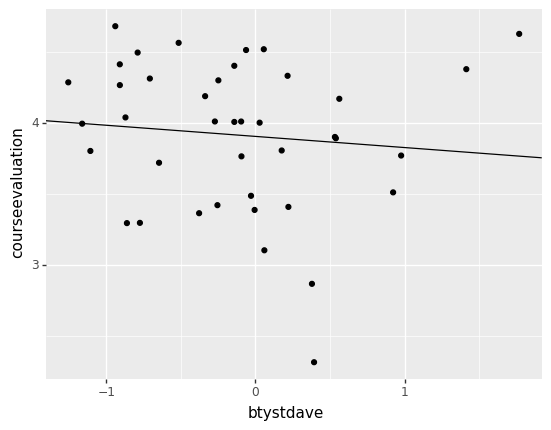

<ggplot: (8771251941696)>

In [7]:
fig1

In [8]:
df['courseevaluation_pred']=results.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
fig4_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=df)
      +p9.geom_point())

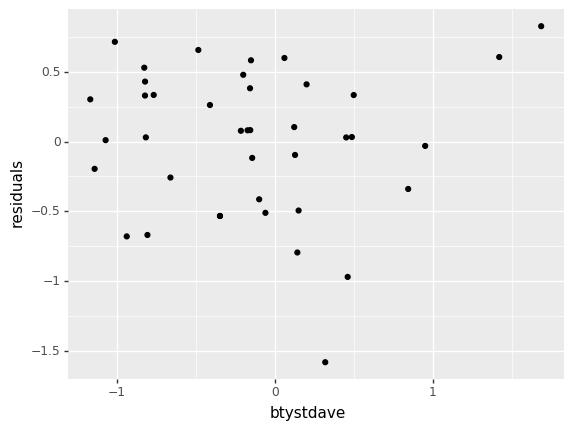

<ggplot: (8771251853309)>

In [9]:
fig4_res

In [11]:
df = pd.read_csv('beauty.csv', nrows=40)
results = smf.ols('courseevaluation ~ beautyf2upper + beautyflowerdiv + beautyf2upper * beautyflowerdiv', data=df).fit()
wyn=results.params

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     3.034
Date:                Sun, 08 Dec 2019   Prob (F-statistic):             0.0416
Time:                        22:28:55   Log-Likelihood:                -26.058
No. Observations:                  40   AIC:                             60.12
Df Residuals:                      36   BIC:                             66.87
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         5.5915      0.602      9.288      0.000       4.371       6.812
beautyf2upper                    -0.3509      0.117     -3.005      0.005      -0.588      -0.114
beautyflowerdiv                  -0.3188      0.145     -2.192      0.035      -0.614      -0.024
beautyf2upper:beautyflowerdiv     0.0642      0.025      2.604      0.013       0.014       0.114
==============================================================================
Omnibus:                        3.911   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.333
Skew:                          -0.707   Prob(JB):                        0.189
Kurtosis:                       2.946   Cond. No.                         214.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
fig4=(p9.ggplot(p9.aes(x='beautyf2upper',y='courseevaluation',color='beautyflowerdiv'),data=df)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['beautyf2upper']))
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept']+wyn['beautyf2upper'],slope=wyn['beautyflowerdiv']+wyn['beautyf2upper:beautyflowerdiv']))     )

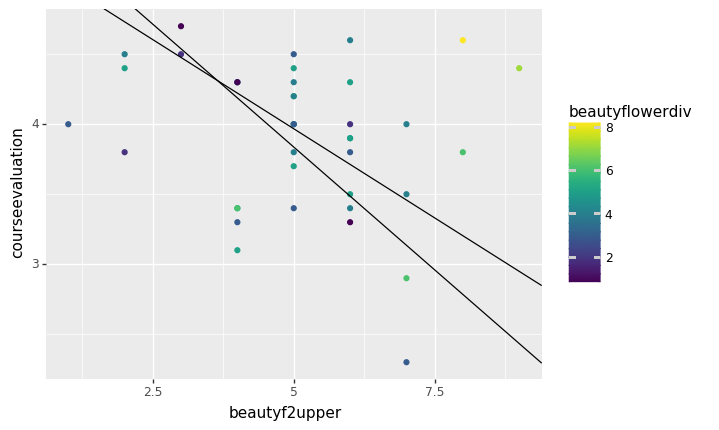

<ggplot: (8771251521136)>

In [16]:
fig4

In [17]:
# compute difference between predcted and real value
df['courseevaluation_pred']=results.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
fig4_res=(p9.ggplot(p9.aes(x='beautyf2upper',y='residuals',color='beautyflowerdiv'),data=df)
      +p9.geom_point())

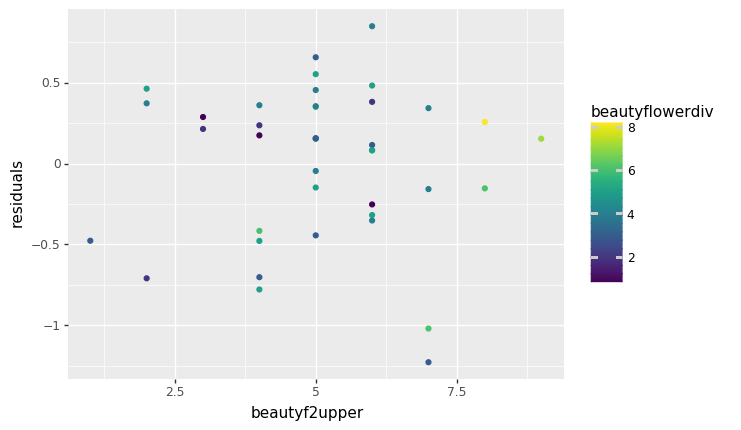

<ggplot: (8771251523729)>

In [18]:
fig4_res